## Depth Contours

### Generate depth-contours of all the Pareto-optimal data sets.

This notebook can be used to generate tradeoff values from all the Pareto-optimal data point files hard-coded in the dictionary `pfs`. Currently this notebook processes these Pareto-optimal fronts.

- DTLZ2 ($m$-Sphere) Problem
- DEBMDK (Knee) Problem
- CDEBMDK (Constrained Knee) Problem
- C0-DTLZ2 (A split $𝑚$-sphere with a small isolated cluster at $f_m$-axis)
- C2-DTLZ2 Problem
- DTLZ8 Problem (A 3-dimensional line and an  𝑚 -dimensional hypersurface)
- GAA Problem (A 10-objective and 18-constraint general aviation design problem)

**Note:** Sometimes, it might happen that `simple_shape.depth_contours()` function does not work for data points if the points are very sparse or they being on a fully convex surface (or on the same hyperplane). In that case, there will be only one layer. We solve this problem by approximating the depth-contours from another set of data points with similar shape and dimentions where the depth-contours are available. Please refer to `cvhull-approximation-test.ipynb` note book. Also note that, this is not a general solution.

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

### Generate and save the depth contours

In this case we are computing the depth-contours from the convex-hulls. So we are using the `tda.simple_shape` module.

In [2]:
sys.path.append('../')
from vis.tda import simple_shape
from vis.utils import io

pfs = {'dtlz2': ['3d', '4d', '8d'], \
       'dtlz2-nbi': ['3d', '4d', '8d'], \
       'debmdk': ['3d', '4d', '8d'], \
       'debmdk-nbi': ['3d', '4d', '8d'], \
       'debmdk-all': ['3d', '4d', '8d'], \
       'debmdk-all-nbi': ['3d', '4d', '8d'], \
       'dtlz8': ['3d', '4d', '6d', '8d'], \
       'dtlz8-nbi': ['3d', '4d', '6d', '8d'], \
       'c2dtlz2': ['3d', '4d', '5d', '8d'], \
       'c2dtlz2-nbi': ['3d', '4d', '5d', '8d'], \
       'cdebmdk': ['3d', '4d', '8d'], \
       'cdebmdk-nbi': ['3d', '4d', '8d'], \
       'c0dtlz2': ['3d', '4d', '8d'], \
       'c0dtlz2-nbi': ['3d', '4d', '8d'], \
       'crash-nbi': ['3d'], 'crash-c1-nbi': ['3d'], 'crash-c2-nbi': ['3d'], \
       'gaa': ['10d'], \
       'gaa-nbi': ['10d']}

for pf in list(pfs.keys())[0:-2]:
    for dim in pfs[pf]:
        fullpathf = "../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
        if os.path.exists(fullpathf):
            path, filenamef = os.path.split(fullpathf)
            dirs = path.split('/')
            frontname = dirs[-2]

            F = np.loadtxt(fullpathf, delimiter=',')
            print(fullpathf, F.shape, dirs, frontname)
            
            # test simple_shape.depth_contour function
            # it looks like these PFs are better displayed if project_collapse=False
            if pf in ['dtlz8', 'dtlz8-nbi', 'crash-nbi', 'crash-c1-nbi', 'crash-c2-nbi']:
                L = simple_shape.depth_contours(F, project_collapse=False)
            elif pf in ['gaa', 'gaa-nbi']:
                L = simple_shape.depth_contours(F, verbose=True)
            else:
                L = simple_shape.depth_contours(F)
            # save the layers
            io.savetxt(os.path.join(path, "depth-cont-cvhull.csv"), L, fmt='{:d}', delimiter=',')
            
            # We are not using this since it's exrtemely slow and also doesn't give
            # layers if all the points are on a fully convex surface.
            # print("Generating depth-contours (project_collapse=False) for " + frontname)
            # # test ss.depth_contour function without projection and collapse
            # L = ss.depth_contours(F, project_collapse = False)
            # save the layers
            # io.savetxt(os.path.join(path, "depth-cont-cvhull.csv"), L, fmt = '{:d}', delimiter = ',')

../data/dtlz2/3d/dataf.csv (1000, 3) ['..', 'data', 'dtlz2', '3d'] dtlz2
../data/dtlz2/4d/dataf.csv (2000, 4) ['..', 'data', 'dtlz2', '4d'] dtlz2
../data/dtlz2/8d/dataf.csv (4000, 8) ['..', 'data', 'dtlz2', '8d'] dtlz2
../data/dtlz2-nbi/3d/dataf.csv (990, 3) ['..', 'data', 'dtlz2-nbi', '3d'] dtlz2-nbi
../data/dtlz2-nbi/4d/dataf.csv (1771, 4) ['..', 'data', 'dtlz2-nbi', '4d'] dtlz2-nbi
../data/dtlz2-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'dtlz2-nbi', '8d'] dtlz2-nbi
../data/debmdk/3d/dataf.csv (1047, 3) ['..', 'data', 'debmdk', '3d'] debmdk
../data/debmdk/4d/dataf.csv (1967, 4) ['..', 'data', 'debmdk', '4d'] debmdk
../data/debmdk/8d/dataf.csv (4077, 8) ['..', 'data', 'debmdk', '8d'] debmdk
../data/debmdk-nbi/3d/dataf.csv (1143, 3) ['..', 'data', 'debmdk-nbi', '3d'] debmdk-nbi
../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi
../data/debmdk-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'debmdk-nbi', '8d'] debmdk-nbi
../data/debmdk-all/3d/dataf.csv (10

### Plot and verify

../data/dtlz2/3d/dataf.csv (1000, 3) ['..', 'data', 'dtlz2', '3d'] dtlz2


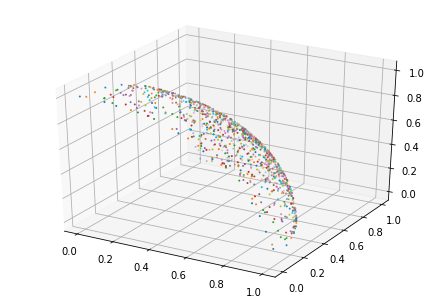

../data/dtlz2/4d/dataf.csv (2000, 4) ['..', 'data', 'dtlz2', '4d'] dtlz2


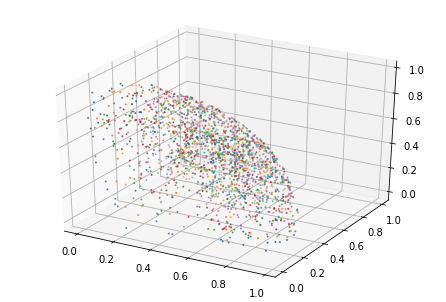

../data/dtlz2/8d/dataf.csv (4000, 8) ['..', 'data', 'dtlz2', '8d'] dtlz2


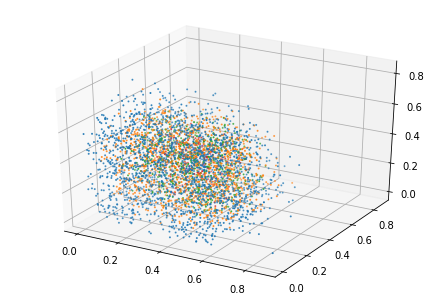

../data/dtlz2-nbi/3d/dataf.csv (990, 3) ['..', 'data', 'dtlz2-nbi', '3d'] dtlz2-nbi


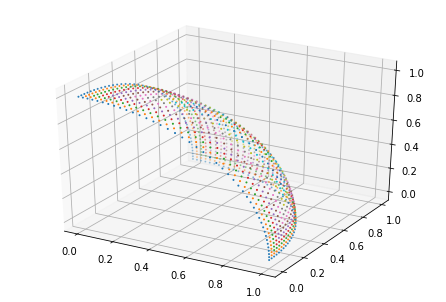

../data/dtlz2-nbi/4d/dataf.csv (1771, 4) ['..', 'data', 'dtlz2-nbi', '4d'] dtlz2-nbi


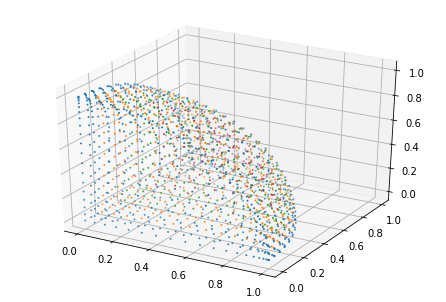

../data/dtlz2-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'dtlz2-nbi', '8d'] dtlz2-nbi


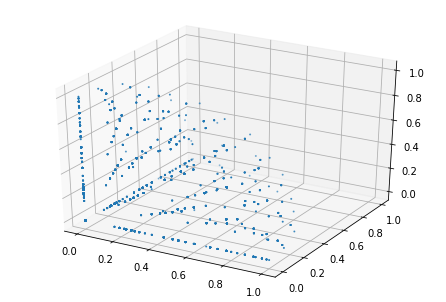

../data/debmdk/3d/dataf.csv (1047, 3) ['..', 'data', 'debmdk', '3d'] debmdk


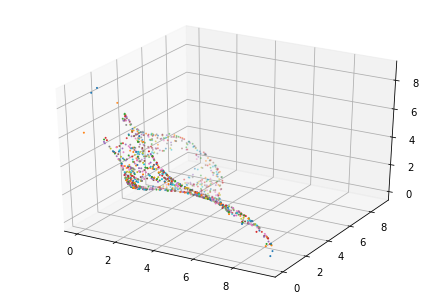

../data/debmdk/4d/dataf.csv (1967, 4) ['..', 'data', 'debmdk', '4d'] debmdk


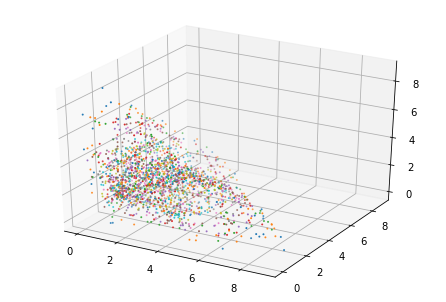

../data/debmdk/8d/dataf.csv (4077, 8) ['..', 'data', 'debmdk', '8d'] debmdk


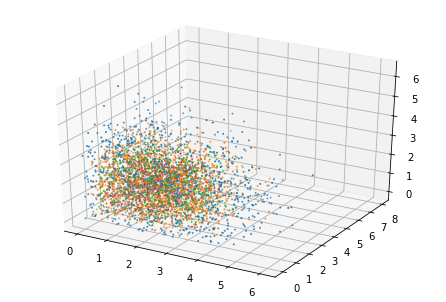

../data/debmdk-nbi/3d/dataf.csv (1143, 3) ['..', 'data', 'debmdk-nbi', '3d'] debmdk-nbi


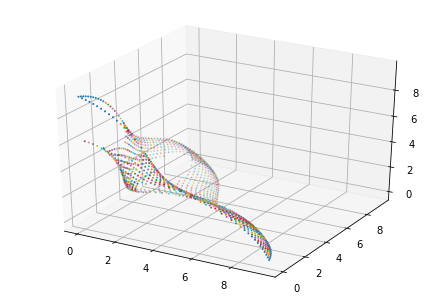

../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi


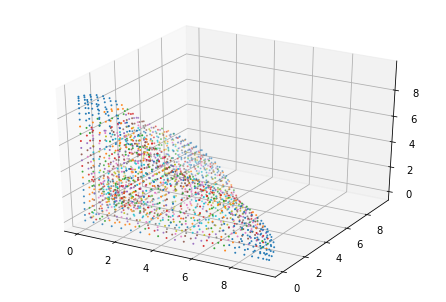

../data/debmdk-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'debmdk-nbi', '8d'] debmdk-nbi


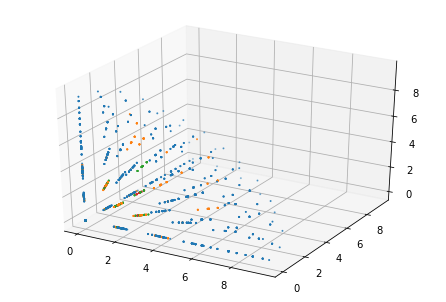

../data/debmdk-all/3d/dataf.csv (1000, 3) ['..', 'data', 'debmdk-all', '3d'] debmdk-all


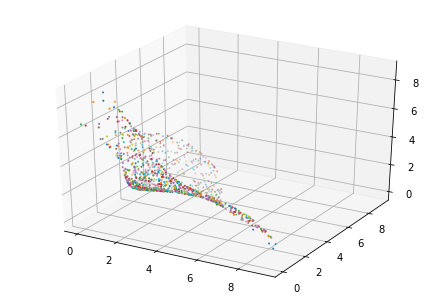

../data/debmdk-all/4d/dataf.csv (2000, 4) ['..', 'data', 'debmdk-all', '4d'] debmdk-all


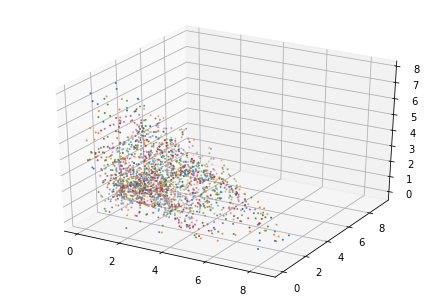

../data/debmdk-all/8d/dataf.csv (4000, 8) ['..', 'data', 'debmdk-all', '8d'] debmdk-all


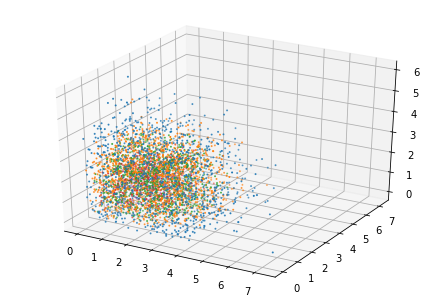

../data/debmdk-all-nbi/3d/dataf.csv (990, 3) ['..', 'data', 'debmdk-all-nbi', '3d'] debmdk-all-nbi


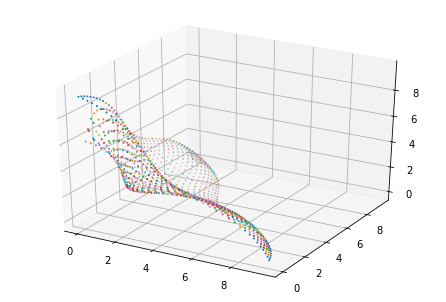

../data/debmdk-all-nbi/4d/dataf.csv (1771, 4) ['..', 'data', 'debmdk-all-nbi', '4d'] debmdk-all-nbi


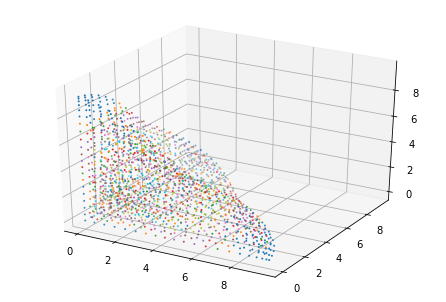

../data/debmdk-all-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'debmdk-all-nbi', '8d'] debmdk-all-nbi


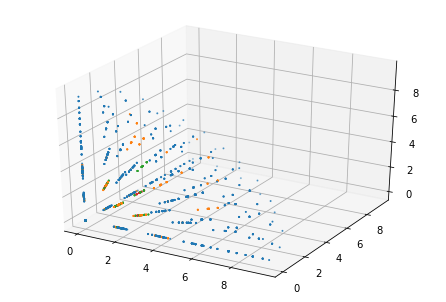

../data/dtlz8/3d/dataf.csv (1038, 3) ['..', 'data', 'dtlz8', '3d'] dtlz8


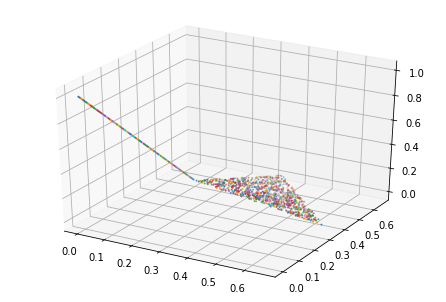

../data/dtlz8/4d/dataf.csv (2105, 4) ['..', 'data', 'dtlz8', '4d'] dtlz8


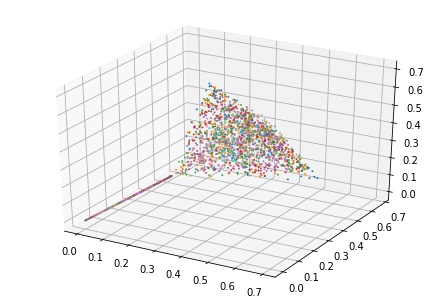

../data/dtlz8/6d/dataf.csv (2659, 6) ['..', 'data', 'dtlz8', '6d'] dtlz8


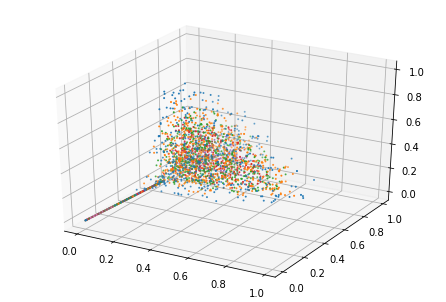

../data/dtlz8/8d/dataf.csv (3680, 8) ['..', 'data', 'dtlz8', '8d'] dtlz8


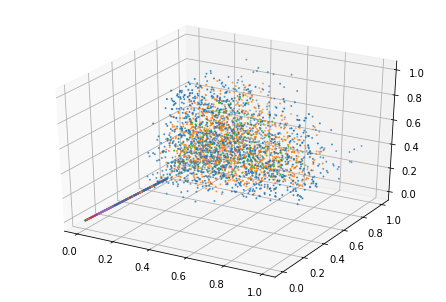

../data/dtlz8-nbi/3d/dataf.csv (1025, 3) ['..', 'data', 'dtlz8-nbi', '3d'] dtlz8-nbi


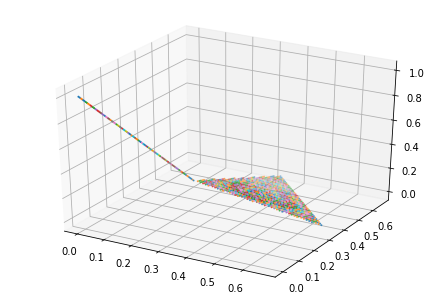

../data/dtlz8-nbi/4d/dataf.csv (2088, 4) ['..', 'data', 'dtlz8-nbi', '4d'] dtlz8-nbi


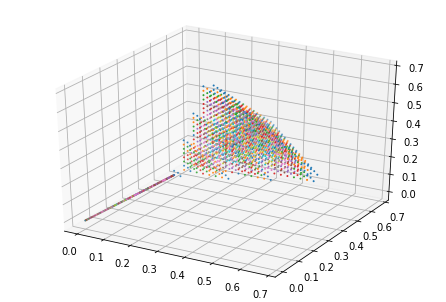

../data/dtlz8-nbi/6d/dataf.csv (3535, 6) ['..', 'data', 'dtlz8-nbi', '6d'] dtlz8-nbi


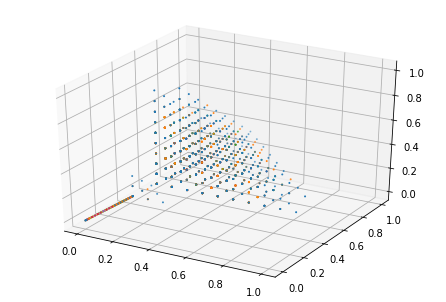

../data/dtlz8-nbi/8d/dataf.csv (2277, 8) ['..', 'data', 'dtlz8-nbi', '8d'] dtlz8-nbi


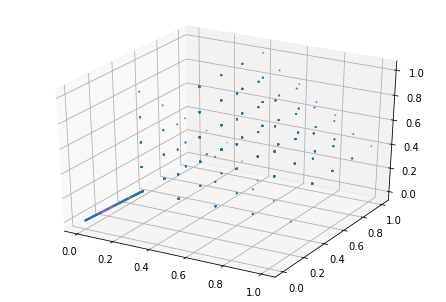

../data/c2dtlz2/3d/dataf.csv (1086, 3) ['..', 'data', 'c2dtlz2', '3d'] c2dtlz2


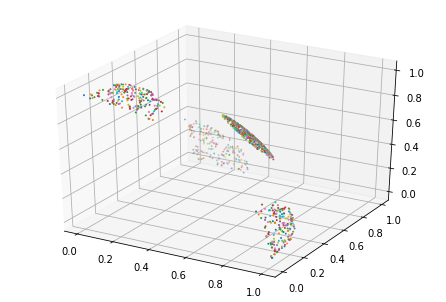

../data/c2dtlz2/4d/dataf.csv (2088, 4) ['..', 'data', 'c2dtlz2', '4d'] c2dtlz2


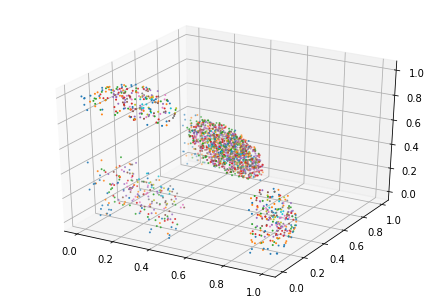

../data/c2dtlz2/5d/dataf.csv (2098, 5) ['..', 'data', 'c2dtlz2', '5d'] c2dtlz2


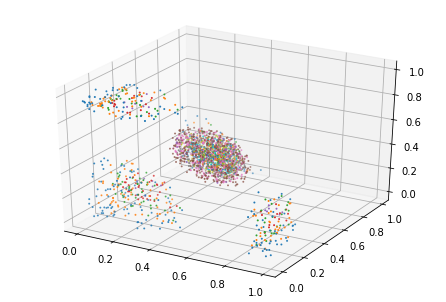

../data/c2dtlz2/8d/dataf.csv (4305, 8) ['..', 'data', 'c2dtlz2', '8d'] c2dtlz2


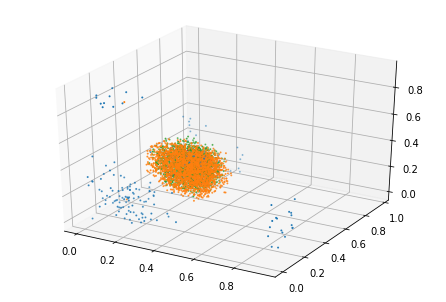

../data/c2dtlz2-nbi/3d/dataf.csv (1036, 3) ['..', 'data', 'c2dtlz2-nbi', '3d'] c2dtlz2-nbi


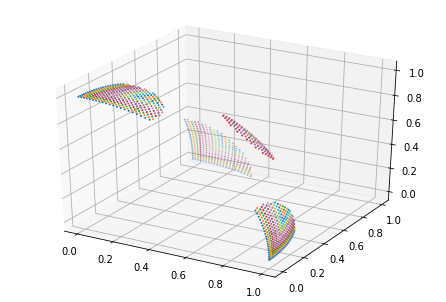

../data/c2dtlz2-nbi/4d/dataf.csv (1984, 4) ['..', 'data', 'c2dtlz2-nbi', '4d'] c2dtlz2-nbi


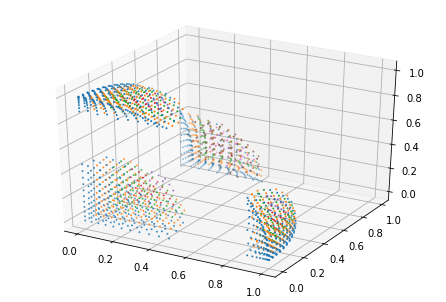

../data/c2dtlz2-nbi/5d/dataf.csv (2280, 5) ['..', 'data', 'c2dtlz2-nbi', '5d'] c2dtlz2-nbi


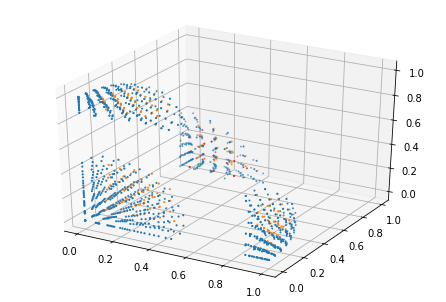

../data/c2dtlz2-nbi/8d/dataf.csv (3872, 8) ['..', 'data', 'c2dtlz2-nbi', '8d'] c2dtlz2-nbi


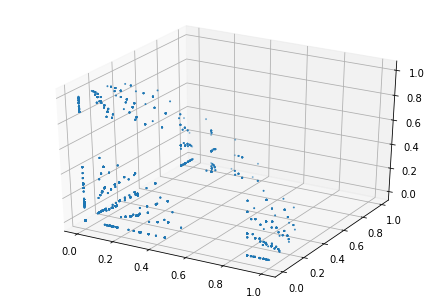

../data/cdebmdk/3d/dataf.csv (1099, 3) ['..', 'data', 'cdebmdk', '3d'] cdebmdk


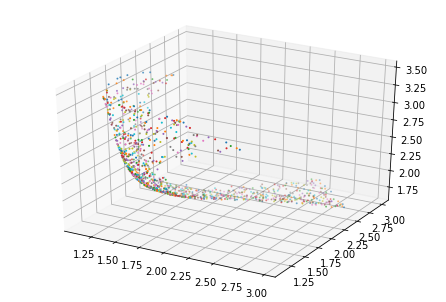

../data/cdebmdk/4d/dataf.csv (1982, 4) ['..', 'data', 'cdebmdk', '4d'] cdebmdk


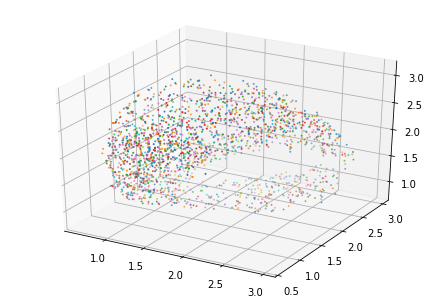

../data/cdebmdk/8d/dataf.csv (3919, 8) ['..', 'data', 'cdebmdk', '8d'] cdebmdk


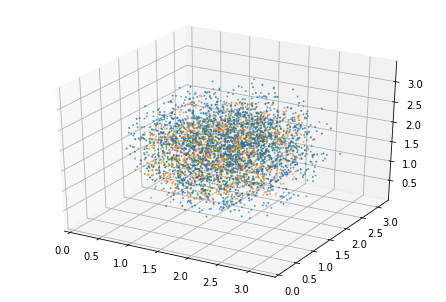

../data/cdebmdk-nbi/3d/dataf.csv (1049, 3) ['..', 'data', 'cdebmdk-nbi', '3d'] cdebmdk-nbi


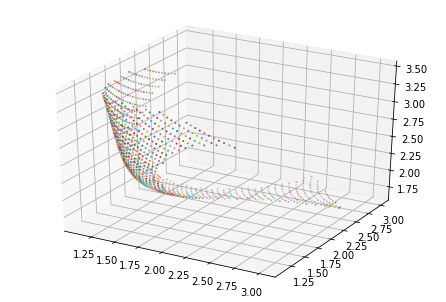

../data/cdebmdk-nbi/4d/dataf.csv (2042, 4) ['..', 'data', 'cdebmdk-nbi', '4d'] cdebmdk-nbi


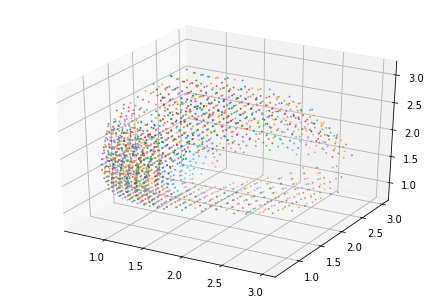

../data/cdebmdk-nbi/8d/dataf.csv (3380, 8) ['..', 'data', 'cdebmdk-nbi', '8d'] cdebmdk-nbi


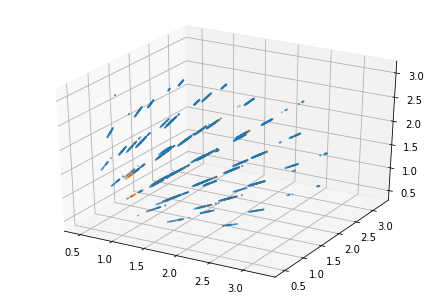

../data/c0dtlz2/3d/dataf.csv (1002, 3) ['..', 'data', 'c0dtlz2', '3d'] c0dtlz2


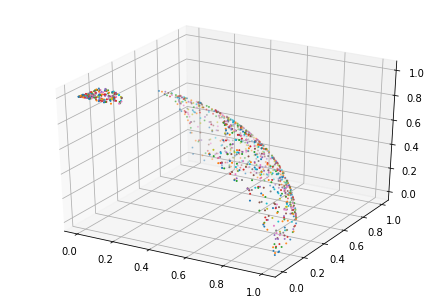

../data/c0dtlz2/4d/dataf.csv (2003, 4) ['..', 'data', 'c0dtlz2', '4d'] c0dtlz2


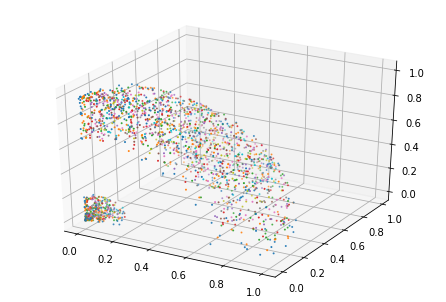

../data/c0dtlz2/8d/dataf.csv (4005, 8) ['..', 'data', 'c0dtlz2', '8d'] c0dtlz2


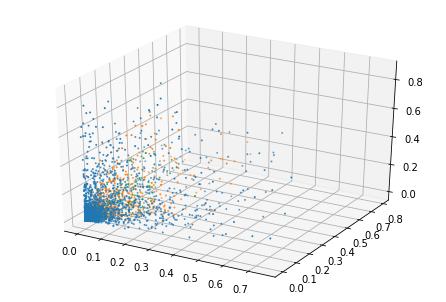

../data/c0dtlz2-nbi/3d/dataf.csv (983, 3) ['..', 'data', 'c0dtlz2-nbi', '3d'] c0dtlz2-nbi


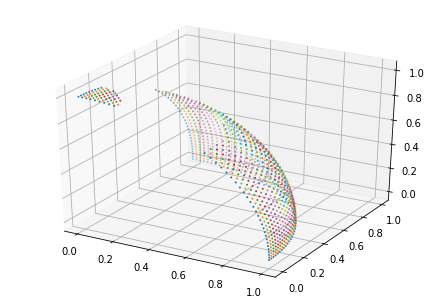

../data/c0dtlz2-nbi/4d/dataf.csv (1916, 4) ['..', 'data', 'c0dtlz2-nbi', '4d'] c0dtlz2-nbi


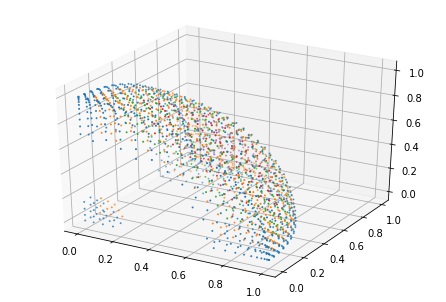

../data/c0dtlz2-nbi/8d/dataf.csv (3180, 8) ['..', 'data', 'c0dtlz2-nbi', '8d'] c0dtlz2-nbi


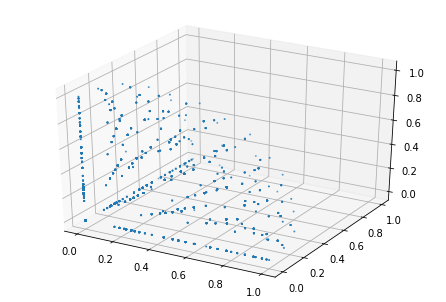

../data/crash-nbi/3d/dataf.csv (4450, 3) ['..', 'data', 'crash-nbi', '3d'] crash-nbi


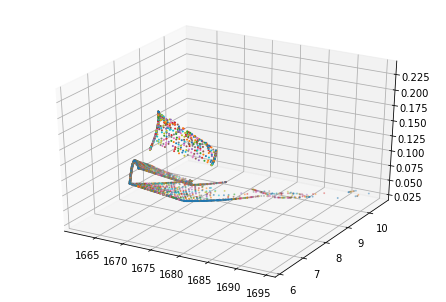

../data/crash-c1-nbi/3d/dataf.csv (711, 3) ['..', 'data', 'crash-c1-nbi', '3d'] crash-c1-nbi


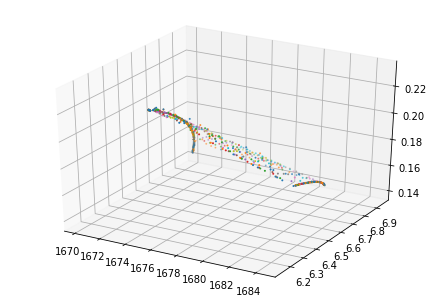

../data/crash-c2-nbi/3d/dataf.csv (3739, 3) ['..', 'data', 'crash-c2-nbi', '3d'] crash-c2-nbi


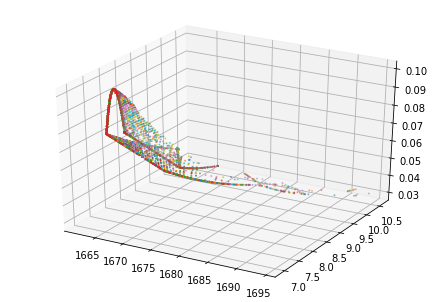

../data/gaa/10d/dataf.csv (3112, 10) ['..', 'data', 'gaa', '10d'] gaa


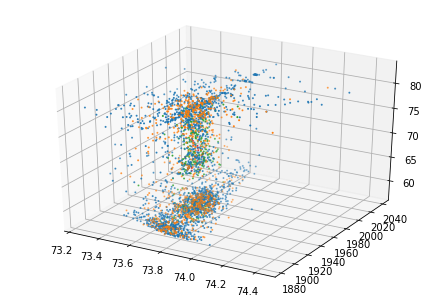

../data/gaa-nbi/10d/dataf.csv (3112, 10) ['..', 'data', 'gaa-nbi', '10d'] gaa-nbi


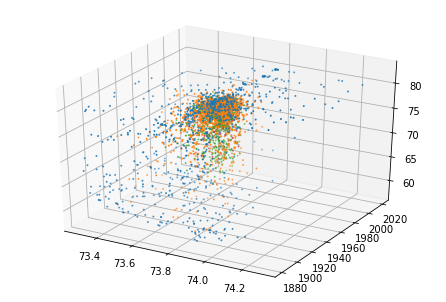

In [3]:
%matplotlib inline

sys.path.append('../')
from vis.utils import io

pfs = {'dtlz2': ['3d', '4d', '8d'], \
       'dtlz2-nbi': ['3d', '4d', '8d'], \
       'debmdk': ['3d', '4d', '8d'], \
       'debmdk-nbi': ['3d', '4d', '8d'], \
       'debmdk-all': ['3d', '4d', '8d'], \
       'debmdk-all-nbi': ['3d', '4d', '8d'], \
       'dtlz8': ['3d', '4d', '6d', '8d'], \
       'dtlz8-nbi': ['3d', '4d', '6d', '8d'], \
       'c2dtlz2': ['3d', '4d', '5d', '8d'], \
       'c2dtlz2-nbi': ['3d', '4d', '5d', '8d'], \
       'cdebmdk': ['3d', '4d', '8d'], \
       'cdebmdk-nbi': ['3d', '4d', '8d'], \
       'c0dtlz2': ['3d', '4d', '8d'], \
       'c0dtlz2-nbi': ['3d', '4d', '8d'], \
       'crash-nbi': ['3d'], 'crash-c1-nbi': ['3d'], 'crash-c2-nbi': ['3d'], \
       'gaa': ['10d'], \
       'gaa-nbi': ['10d']}

for pf in list(pfs.keys()):
    for dim in pfs[pf]:
        fullpathf = "../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
        if os.path.exists(fullpathf):
            path, filenamef = os.path.split(fullpathf)
            dirs = path.split('/')
            frontname = dirs[-2]
            
            F = np.loadtxt(fullpathf, delimiter = ',')
            print(fullpathf, F.shape, dirs, frontname)
            
            layerpathf = os.path.join(path, "depth-cont-cvhull.csv")
            if os.path.exists(layerpathf):
                L = io.loadtxt(layerpathf, dtype=int, delimiter=',')
                if F.shape[1] == 2:
                    fig = plt.figure()
                    ax = fig.gca()
                    for l in L:
                        ax.scatter(F[l.astype(int),0], F[l.astype(int),1], s=1)
                    plt.show()
                else:
                    fig = plt.figure()
                    ax = Axes3D(fig)
                    for l in L:
                        ax.scatter(F[l.astype(int),0], F[l.astype(int),1], F[l.astype(int),2], s=1)
                    plt.show()